In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from analysis import visualize_decision_trees, wl_accuracy, season_record, runs_per_game, test_n
from data_format import create_data

In [2]:
version = 6
df = pd.read_csv(f'./data/baseball/training/game_data_v{version}.csv')

In [3]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(df, y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(df, y_col='home_score', split_by='season')

In [4]:
model_away = RandomForestRegressor(n_estimators=3, max_features='sqrt')
model_home = RandomForestRegressor(n_estimators=3, max_features='sqrt')

model_away.fit(x_train_away, y_train_away)
model_home.fit(x_train_home, y_train_home)

pred_away = model_away.predict(x_test_away)
pred_home = model_home.predict(x_test_home)

results = pd.DataFrame({'away_pred': pred_away, 'home_pred': pred_home, 'away_true': y_test_away, 'home_true': y_test_home})
results.describe()

print('RANDOM FOREST REGRESSION MODEL (v2 - with increased variance)')
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)
print('-' * 30)
runs_per_game(df, results)

RANDOM FOREST REGRESSION MODEL (v2 - with increased variance)
Accuracy: 53.41563786008231%
------------------------------
Season records:
TB: 112-50	TOR: 106-56	LAD: 104-58	ATL: 104-58	HOU: 96-66	
SF: 93-69	TEX: 93-69	BAL: 92-70	SEA: 92-70	CLE: 90-72	
PHI: 90-72	CHC: 89-73	SD: 85-77	DET: 84-78	CIN: 82-80	
MIL: 81-81	MIA: 80-82	BOS: 79-83	NYM: 78-84	STL: 77-85	
AZ: 76-86	LAA: 76-86	MIN: 74-88	NYY: 68-94	WSH: 66-96	
KC: 64-98	PIT: 58-104	CWS: 55-107	COL: 45-117	OAK: 41-121	
------------------------------
Runs scored per game:
ATL: 5.77 (935)	LAD: 5.73 (929)	TB: 5.21 (844)	TOR: 5.13 (832)	SF: 4.95 (802)	
TEX: 4.95 (802)	SEA: 4.92 (796)	AZ: 4.91 (796)	HOU: 4.91 (795)	CHC: 4.79 (777)	
PHI: 4.72 (765)	SD: 4.72 (765)	NYM: 4.72 (764)	MIL: 4.69 (760)	MIA: 4.68 (758)	
LAA: 4.66 (755)	CIN: 4.65 (753)	CLE: 4.65 (753)	BAL: 4.6 (745)	STL: 4.55 (737)	
KC: 4.52 (733)	MIN: 4.52 (732)	WSH: 4.52 (732)	BOS: 4.48 (726)	DET: 4.47 (725)	
NYY: 4.43 (717)	PIT: 4.4 (713)	CWS: 4.15 (672)	COL: 4.03 (654)	OAK: 3.8

By using fewer decision trees, the aggregate records came out to be more realistic - even if it did come at the cost of losing some accuracy. Looking at the histogram below, we can see that this modified version has a mean accuracy of about 53%, which is still better than a random guessing model.

                0
count  500.000000
mean    52.995473
std      1.030922
min     49.218107
25%     52.345679
50%     52.962963
75%     53.713992
max     55.925926


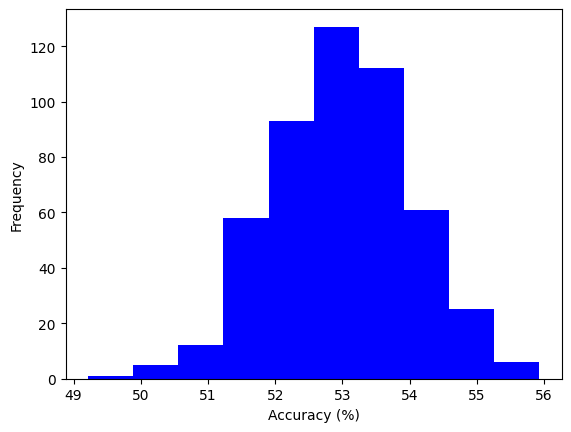

In [5]:
test_n(model_away, model_home, x_train_away, y_train_away, x_train_home, y_train_home, x_test_away, y_test_away, x_test_home, y_test_home, n_iter=500)

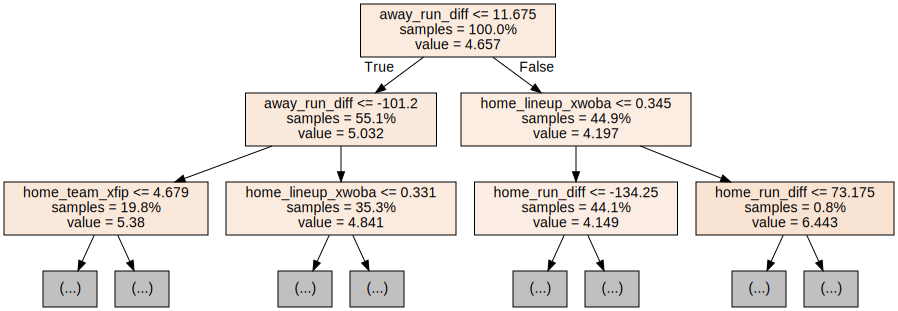

In [9]:
visualize_decision_trees(model_home, x_test_home.columns)